# Root Finding

In [1]:
import numpy as np
from scipy.optimize import fsolve
from IPython.display import display

## Bisection Method

Bisection Method is based on Intermediate Value Theorem (IVT).  
**IVT**: Let $f : [a, b] → \mathbb{R}$ be continuous on $[a, b]$ such that $f(a)$ and $f(b)$ have opposite signs. Then, $f$ has a zero in the interval $(a, b)$. That is, there exists $c ∈ (a, b)$ such that $f(c) = 0$.  
**Refer AM2013 course notes for more details and limitation of this method.**

In [2]:
def bisection_method(f, a, b, tol):
  if(f(a)*f(b) >= 0):
    raise ValueError("Bisection method cannot be applied.")

  m = (a+b)/2

  if abs(f(m)) < tol:
    return m
  elif f(m)*f(b) < 0:
    return bisection_method(f, m, b, tol)
  elif f(a)*f(m) < 0:
    return bisection_method(f, a, m, tol)

First let's find the root of $f(x)=x^2 - e^{-x} - 2sin(x)$ within [0, 2]. To obatain a good approximation for the root in the given interval, **fsolve** method can be used which is defined in **scipy.optimize**.

In [3]:
# Define f(x) as a python function
f = lambda x: x**2 - np.exp(-x) - 2*np.sin(x)

In [4]:
root_fsolve = fsolve(f, 2)[0]
print(f"Root obtained using fsolve method = {root_fsolve}")

Root obtained using fsolve method = 1.4895886408077366


Before appying bisection method **it is nessasary to check whether $f(x)$ satisfies the conditions defined in IVT.**


1.   Continuity on interval - Since $x^2, e^{-x} \text{ and } sin(x)$ are cts. on $\mathbb{R}$ ⇒ cts. on [0, 2]. Therefore $f(x)$ must be cts. on [0, 2].
2.   Check whether $f(a)f(b)<0$.



In [5]:
# Check the second condition.
print(f(0)*f(2) < 0)

True


Therefore there exist a root of $f(x)$ in [0, 2]. Therefore bisection method can be appied to find the root. Now let's find it using bisection method with 0.001 tolerance.

In [6]:
root_bisection = bisection_method(f, 0, 2, 0.001)
print(f"Root obtained using bisection method = {root_bisection}")

Root obtained using bisection method = 1.48974609375


In [7]:
# Get the difference between solution of fsolve and bisection method.
print(np.abs(root_fsolve - root_bisection))

0.0001574529422634363


## Newton-Raphson Method

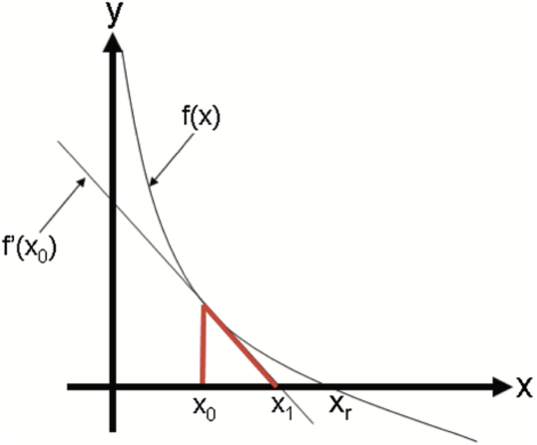

Suppose $x_r$ is a root of $f(x)$ ⇒ $f(x_r)=0$. For $f'(x_0)\neq 0$ and $x_0$ is “close enough” to $x_r$ and according to the figure,
\begin{align}
\frac{f(x_0)}{x_0-x_1}&=f'(x_0)\\
x_0 - \frac{f(x_0)}{f'(x_0)}&=x_1
\end{align}
By continuing this process, an "good" approximation can be obtained.
$$
x_n - \frac{f(x_n)}{f'(x_n)}=x_{n+1}
$$
Here, $n=0,1,2,⋯$ and $f'(x_n)\neq 0$. **Refer AM2013 course notes for more details and limitation of this method.**

In [8]:
def newton_raphson(f, f_prime, initial_guess, tolerance=1e-6, max_iterations=100):
  iterations = 0
  new_guess = initial_guess
  while abs(f(new_guess)) >= tolerance and iterations < max_iterations:
    new_guess = new_guess - (f(new_guess)/f_prime(new_guess))
    iterations += 1

  if abs(f(new_guess)) >= tolerance and iterations >= max_iterations:
    print("Root cannot be found")
    return None

  return new_guess

First let's find the root of $f(x)=x^2 - e^{-x} - 2sin(x)$ within [0, 2]. To obatain a good approximation for the root in the given interval, **fsolve** method can be used which is defined in **scipy.optimize**.

In [9]:
# Define f(x) as a python function
f = lambda x: x**2 - np.exp(-x) - 2*np.sin(x)

In [10]:
root_fsolve = fsolve(f, 2)[0]
print(f"Root obtained using fsolve method = {root_fsolve}")

Root obtained using fsolve method = 1.4895886408077366


Now find the root by using Newton's Raphson Method.

In [11]:
# Define f'(x)
f_prime = lambda x: 2*x + np.exp(-x) - 2*np.cos(x)

In [12]:
root_newton = newton_raphson(f, f_prime, 2, 0.001)
print(f"Root obtained using newton's raphson method = {root_newton}")

Root obtained using newton's raphson method = 1.4896064790980141


In [13]:
# Get the difference between solution of fsolve and newton's raphson method.
print(np.abs(root_fsolve - root_newton))

1.7838290277572e-05
